In [1]:
# Group: Dominic Klusek, Johnathan Rozen
# CSC 732 HW# 1 Part 2

<h1>Description of Ionosphere Dataset</h1>

<h3>Data Set Information:</h3>
<p>This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.</p>
<p>Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.</p>

<h3>Attribute Information</h3>
    <ul>
        <li>There are 34 numeric (float values) attributes, all with values between -1.0 to 1.0, and are reading of the pulse numbers for the Goose Bay System</li>
        <li>The dataset contains 2 class 'g' for Good and 'b' for Bad</li>
        <li>The number of instances in each class are 'b' : 126
'g' : 225</li>
    All data was captured using ther same setup of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.
    </ul>

<h5 style='color:blue'>Listing 1a: Load libraries</h5>

In [2]:
# increase width of jupyter notebook cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Load Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
import seaborn as sns
import numpy as np

In [4]:
# pandas limites the output of functions to prevent overlarge outputs so setting these options will force the library to print all columns
import pandas as pd
pd.set_option('display.max_columns', 500)

# prevent warning because some functions in sklearn have deprecation warning (ONLY ENABLE FOR FINAL CODE)
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load dataset
filename = 'Dataset/ionosphere.data'
names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'D30', 'D31', 'D32', 'D33', 'D34', 'class']
dataset = read_csv(filename, names=names, delimiter=',')

In [6]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:34]
Y = array[:,34]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [7]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [8]:
# evaluate each model in turn,store performance, and output general performance of models
results = []
model_names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.853571 (0.064780)
LDA: 0.867857 (0.061962)
KNN: 0.835714 (0.078571)
CART: 0.867857 (0.055443)
NB: 0.882143 (0.067857)
SVM: 0.925000 (0.046429)


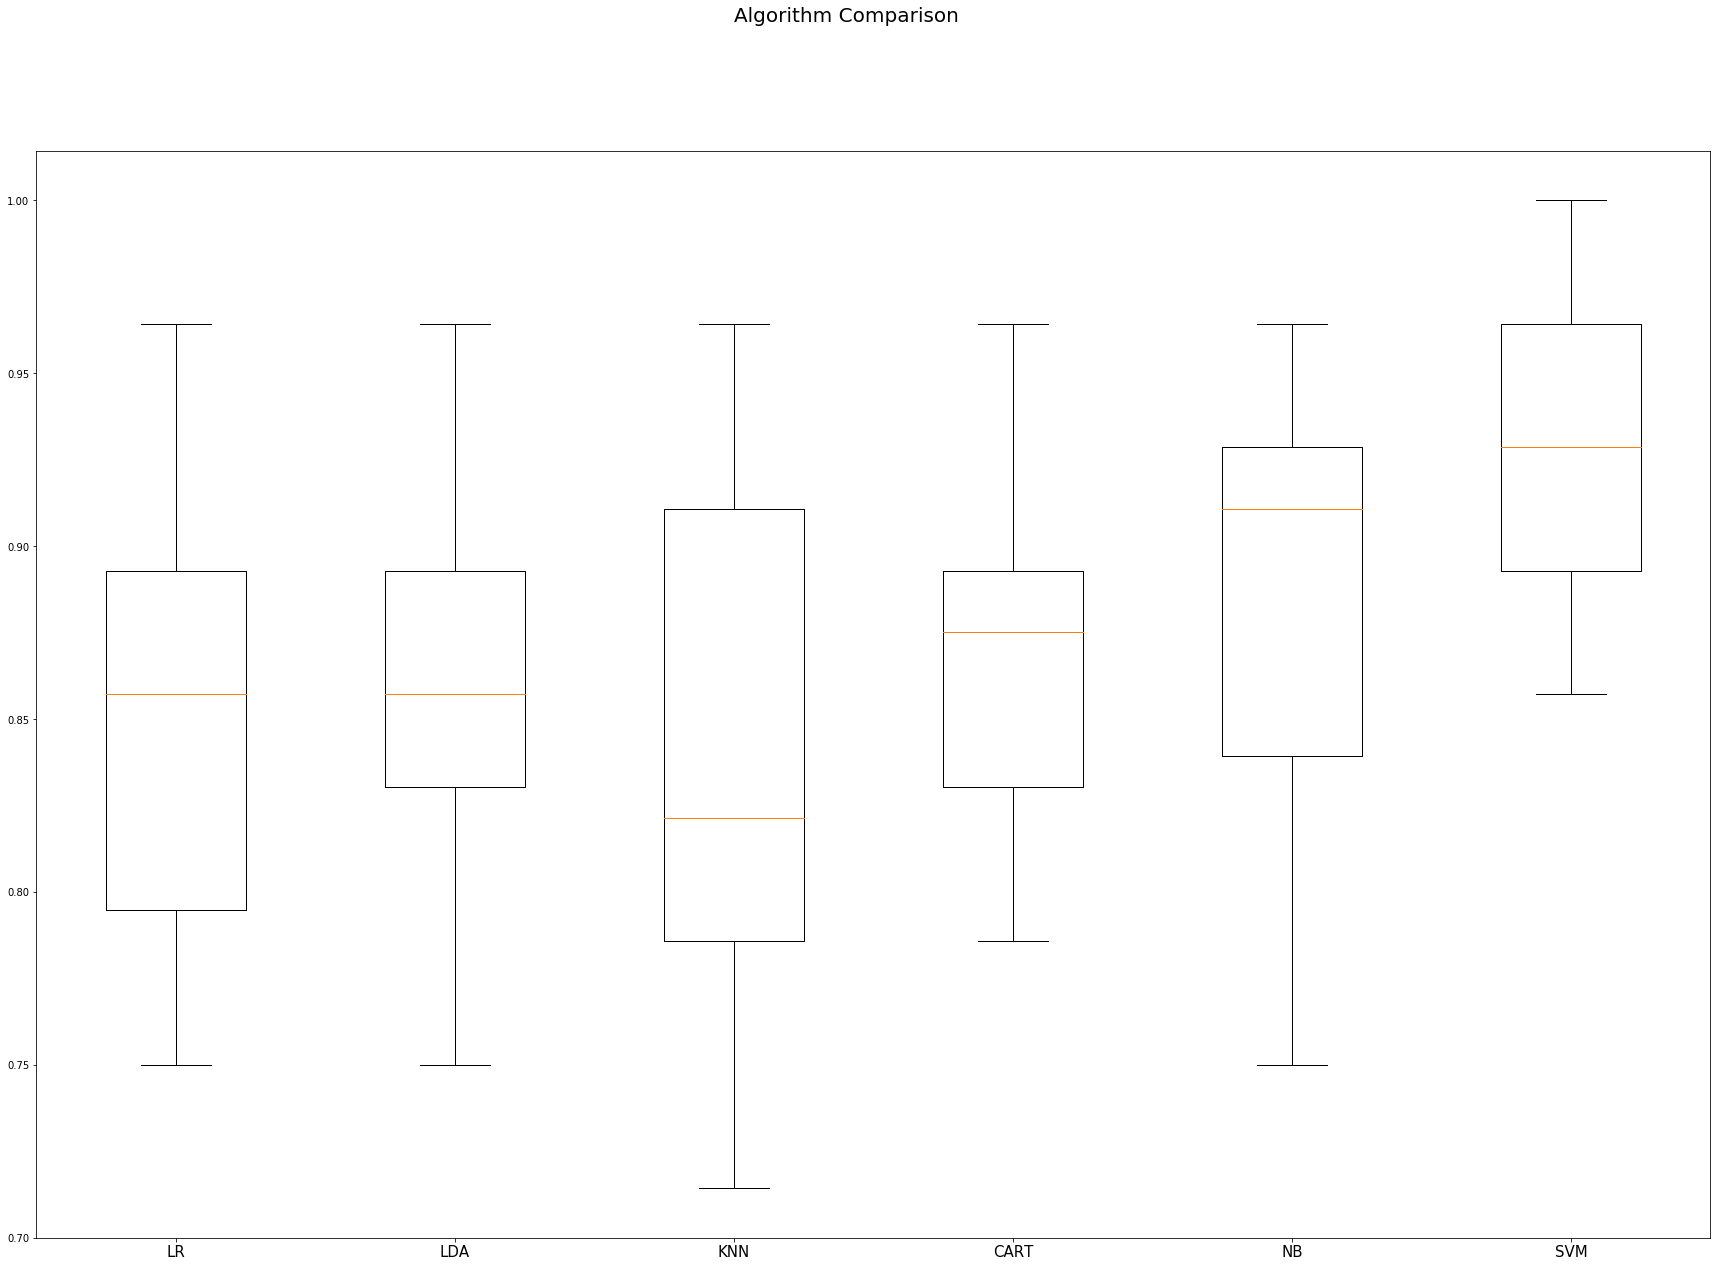

In [9]:
# Compare Algorithms
fig = plt.figure(figsize=(30,20))
#sns.boxplot(x='Model', y="Performance", data=dataframe_results) # seaborn code for part 3
fig.suptitle('Algorithm Comparison', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names, fontdict={'fontsize': 15})
plt.show()

<h1>Part 2</h1>

<h5 style='color:blue'>Listing 6: Observe Correlation of Attributes, Skew of Attributes, and Plot Uninvariate Density Plots for Each Attribute</h5> 

<h5 style='color:blue'>Listing 6a: Correlation Calculation and Heatmap</h5> 

In [10]:
# changing the column names to remove the class column
names = names[0:-1]

# pandas corr method find the correlations score using perason's formula by default
corr = dataset.corr()

# replace values of Nan with 0 since all values in attribute 2 are 0
corr.fillna(value=0, inplace=True)

# change correlation of A2 and itself to 1.0 to follow trend
corr['A2']['A2'] = 1.0

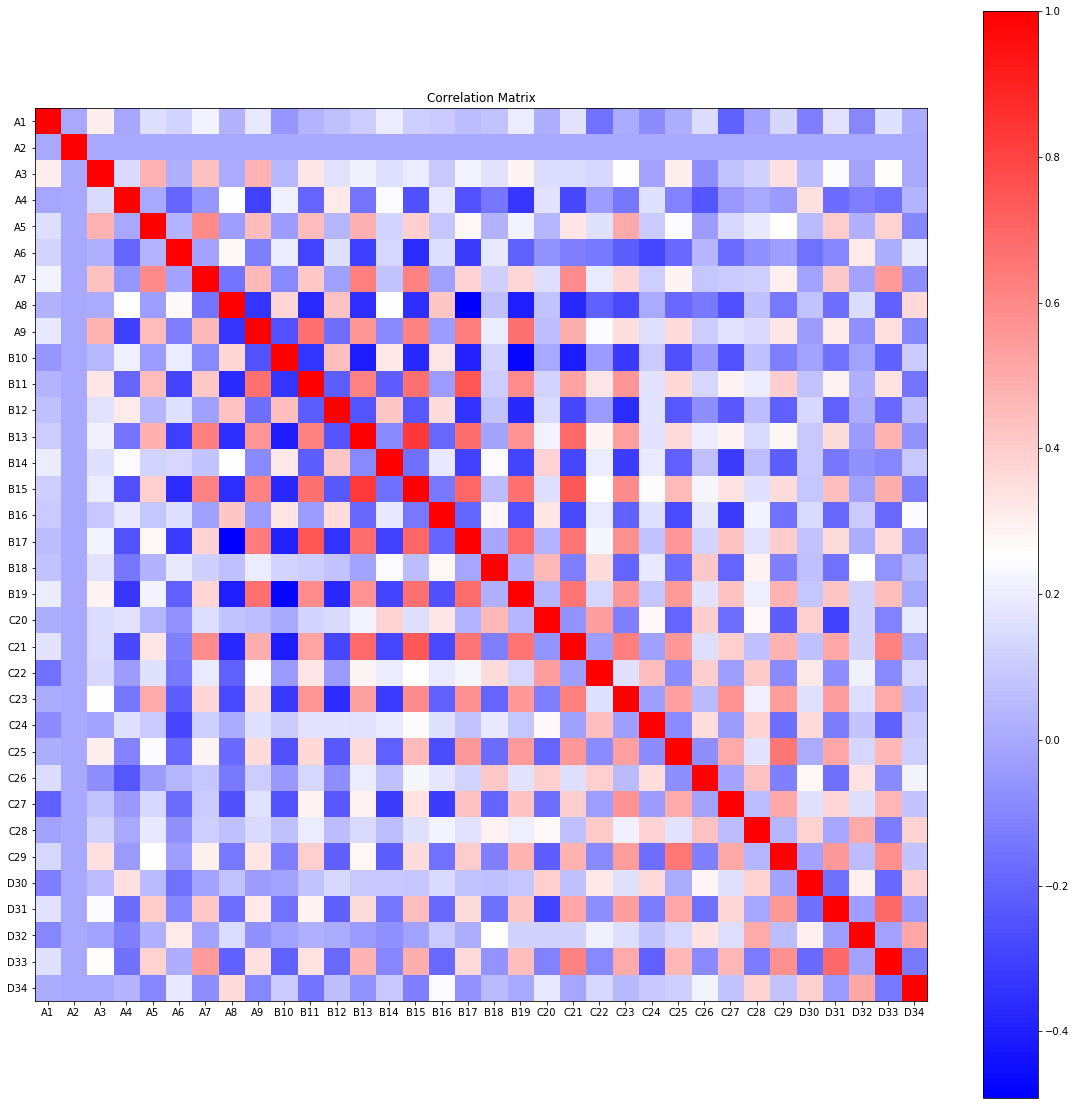

In [11]:
# Correlation matrix expressed as heatmap to better visualize correlation
plt.figure(figsize=(20,20))
plt.imshow(corr, cmap='bwr')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(np.arange(34), names)
plt.yticks(np.arange(34), names)
plt.show()

<p>Since attributes consist of 2 attributes per pulse number, the odd numbered attributes appear to be negatively correlated to even numbered attributes. While odd numbered attributes are positively correlated to other odd numbered attributes, and even numbered atttributes have a more negative correlation to every other attribute.</p>

<h5 style='color:blue'>Listing 6b: Skew of Attributes</h5> 

In [12]:
# calculate skew for each variable in dataset
skew = dataset.skew()
print(skew)

A1    -2.532392
A2     0.000000
A3    -1.851541
A4    -0.228268
A5    -1.627778
A6    -0.279440
A7    -1.307027
A8    -0.217991
A9    -1.091865
B10   -0.028738
B11   -1.044918
B12   -0.081149
B13   -0.876225
B14   -0.219482
B15   -0.775888
B16   -0.098106
B17   -0.821593
B18    0.005083
B19   -0.833409
C20    0.059601
C21   -0.665995
C22    0.066805
C23   -0.744519
C24    0.045253
C25   -0.881588
C26    0.053157
C27   -1.287053
C28    0.066707
C29   -0.885749
D30    0.031059
D31   -0.810506
D32    0.069350
D33   -0.606070
D34    0.112646
dtype: float64


<p>As determined from the histograms in Part 1 allof the attributes are skewed in some respect barring attribute A2 which is all 0. Having many skewed attributes can cause more irregular training due to lack of data cohesion.</p>

<h5 style='color:blue'>Listing 6c: Plot Uninvariate Density Plots for Each Attribute</h5> 

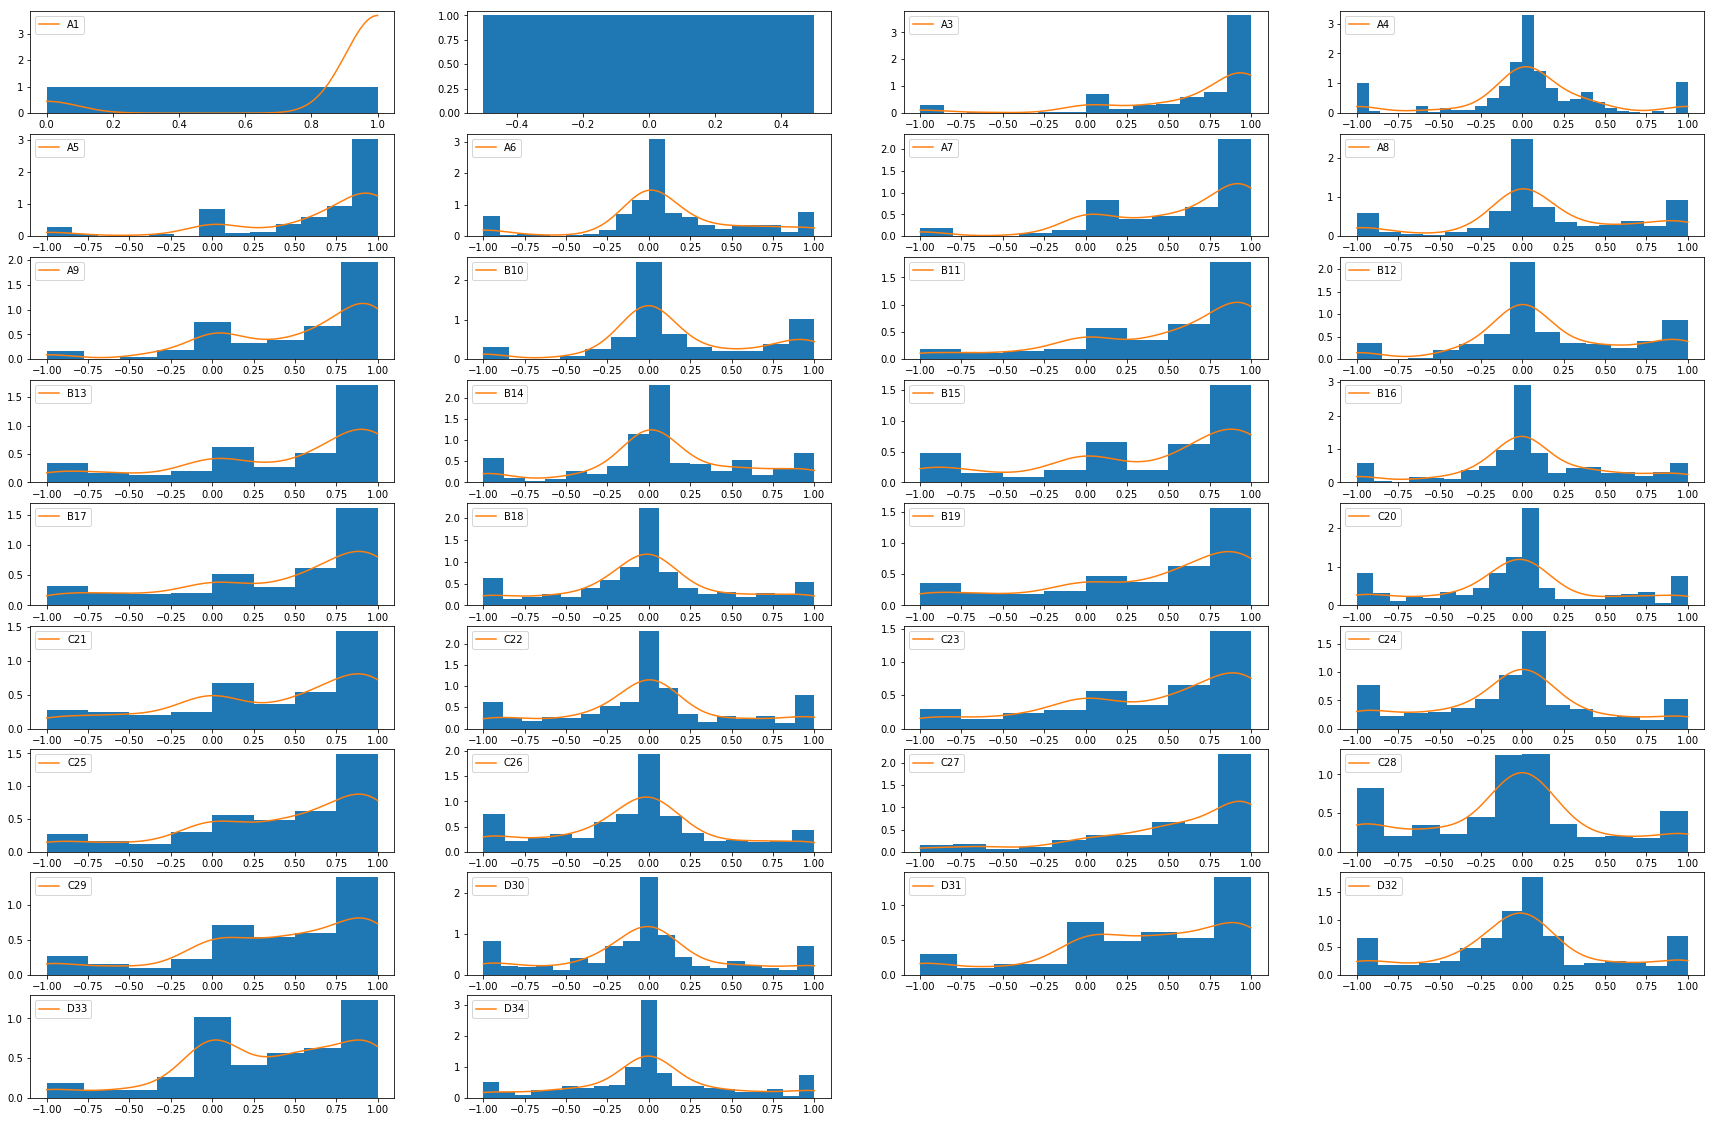

In [13]:
from scipy.stats import gaussian_kde
X_dict = dict(zip(names, X.T))
dataset = pd.DataFrame.from_dict(X_dict, dtype=float)
# plot Univariate Density Plots for all features
plt.figure(figsize=(30,20))
for i, index in enumerate(dataset.columns):
    try:
        # create a subplot to hold each univariate density plot
        plt.subplot(9,4, i + 1)
        # create a series of x values for which the Density Line will be calculated for
        positions = np.linspace(dataset[index].min(), dataset[index].max(), 1000)
        # initializa gaussian Kernel Density Estimator(KDE)
        kernel = gaussian_kde(dataset[index].values)
        # plot histogram
        plt.hist(dataset[index], bins='fd', normed=True)
        # get KDE estimates and plot them
        plt.plot(positions, kernel(positions), label=index)
        # add a legend so that it is easy to distinguish different attributes
        plt.legend(loc=2)
    except:
        # in the case where the matrix is made of a single value just plot histogram
        plt.hist(dataset[index], bins=1, normed=True)
    
plt.show()

<h5 style='color:blue'>Listing 7: Scale Data using Scaling, Standardization, Normalization, and Binarization. Then Analize differences between original and scaled.</h5> 

<h5 style='color:blue'>Listing 7a: Scaling data between 0 and 1</h5> 

In [14]:
# Attribute names with class name taken out
names = names[0:-1]

In [15]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X = scaler.fit_transform(X)
# Split data for training
X_rescaled_train, X_rescaled_validation, Y_rescaled_train, Y_rescaled_validation = train_test_split(rescaled_X, Y, test_size=validation_size, random_state=seed)

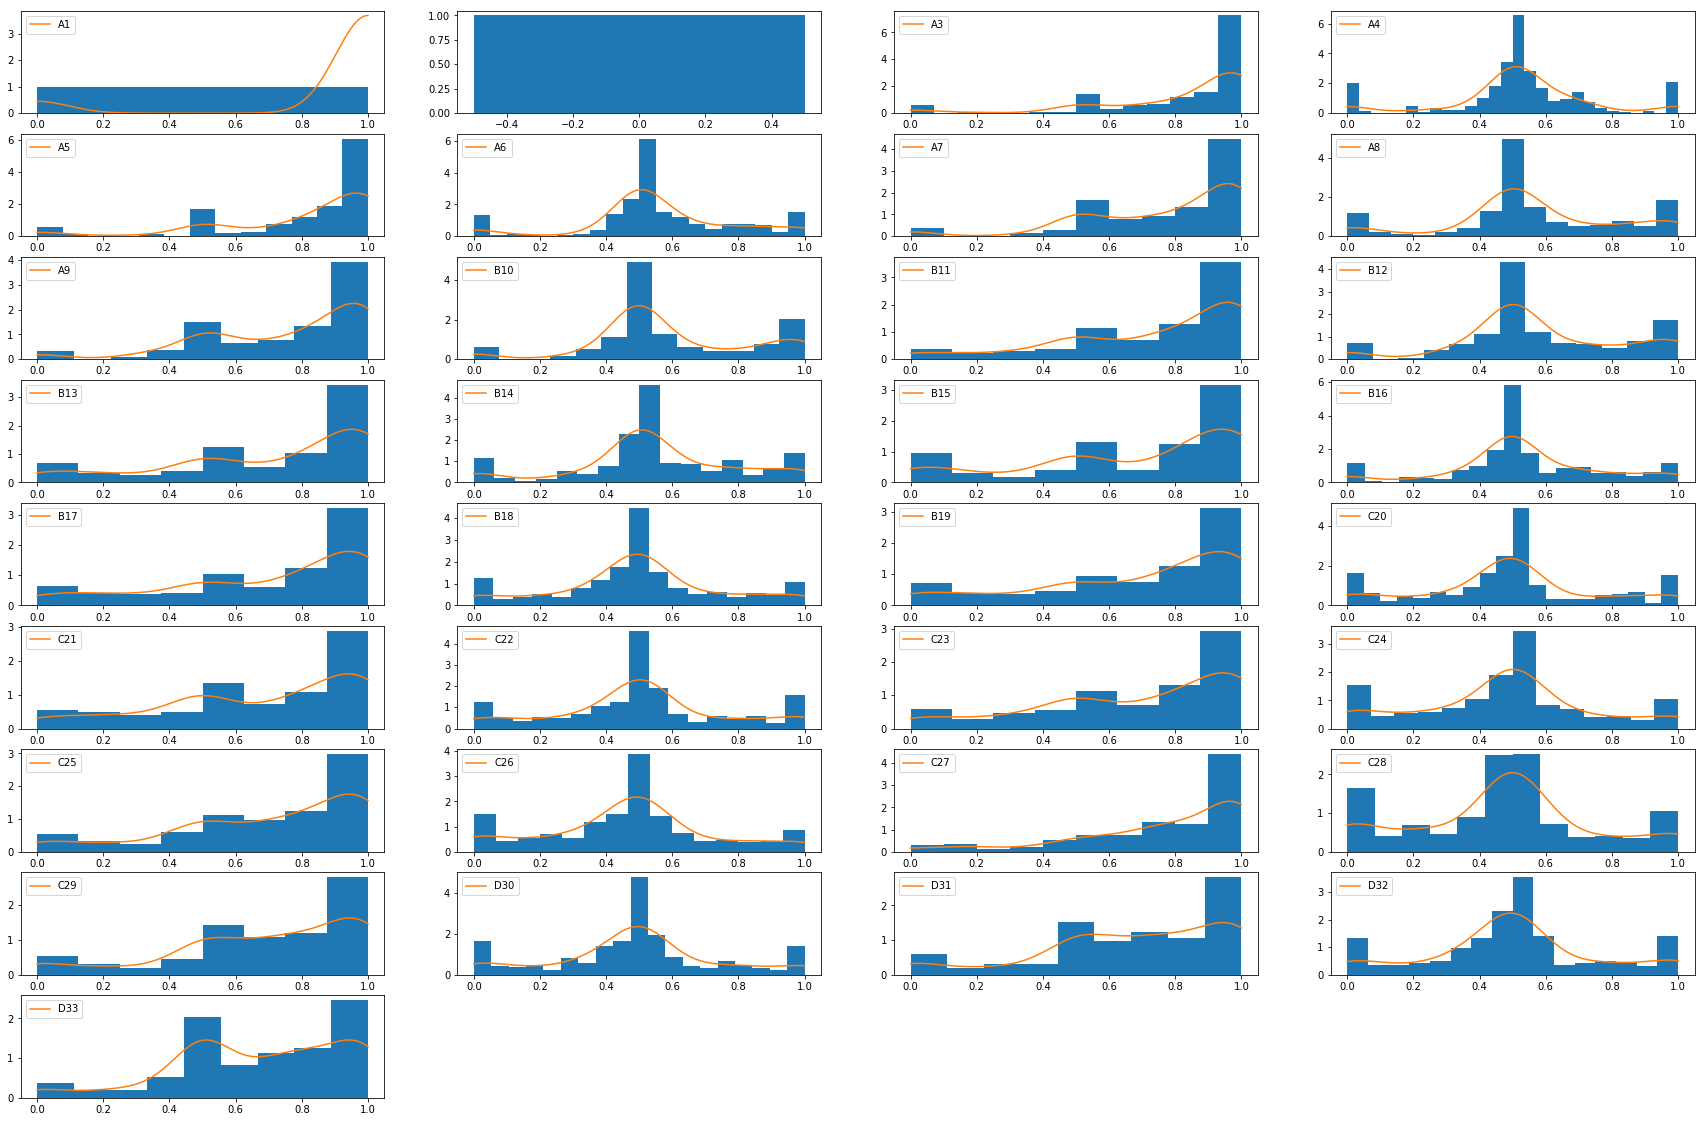

In [16]:
rescaled_X_dict = dict(zip(names, rescaled_X.T))
dataset = pd.DataFrame.from_dict(rescaled_X_dict)
# plot Univariate Density Plots for all features
plt.figure(figsize=(30,20))
for i, index in enumerate(dataset.columns):
    try:
        # create a subplot to hold each univariate density plot
        plt.subplot(9,4, i + 1)
        # create a series of x values for which the Density Line will be calculated for
        positions = np.linspace(dataset[index].min(), dataset[index].max(), 1000)
        # initializa gaussian Kernel Density Estimator(KDE)
        kernel = gaussian_kde(dataset[index].values)
        # plot histogram
        plt.hist(dataset[index], bins='fd', normed=True)
        # get KDE estimates and plot them
        plt.plot(positions, kernel(positions), label=index)
        # add a legend so that it is easy to distinguish different attributes
        plt.legend(loc=2)
    except:
        # in the case where the matrix is made of a single value just plot histogram
        plt.hist(dataset[index], bins=1, normed=True)
    
plt.show()

<p>Scaling the data between 0 and 1 does not change the distribution of the data in terms of skewness, but does remove negative values from the attributes</p>

In [17]:
# evaluate each model in turn,store performance, and output general performance of models
rescaled_results = []
rescaled_model_names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_rescaled_train, Y_rescaled_train, cv=kfold, scoring='accuracy')
    rescaled_results.append(cv_results)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.860714 (0.066720)
LDA: 0.867857 (0.061962)
KNN: 0.839286 (0.080258)
CART: 0.857143 (0.065854)
NB: 0.885714 (0.061445)
SVM: 0.867857 (0.063987)


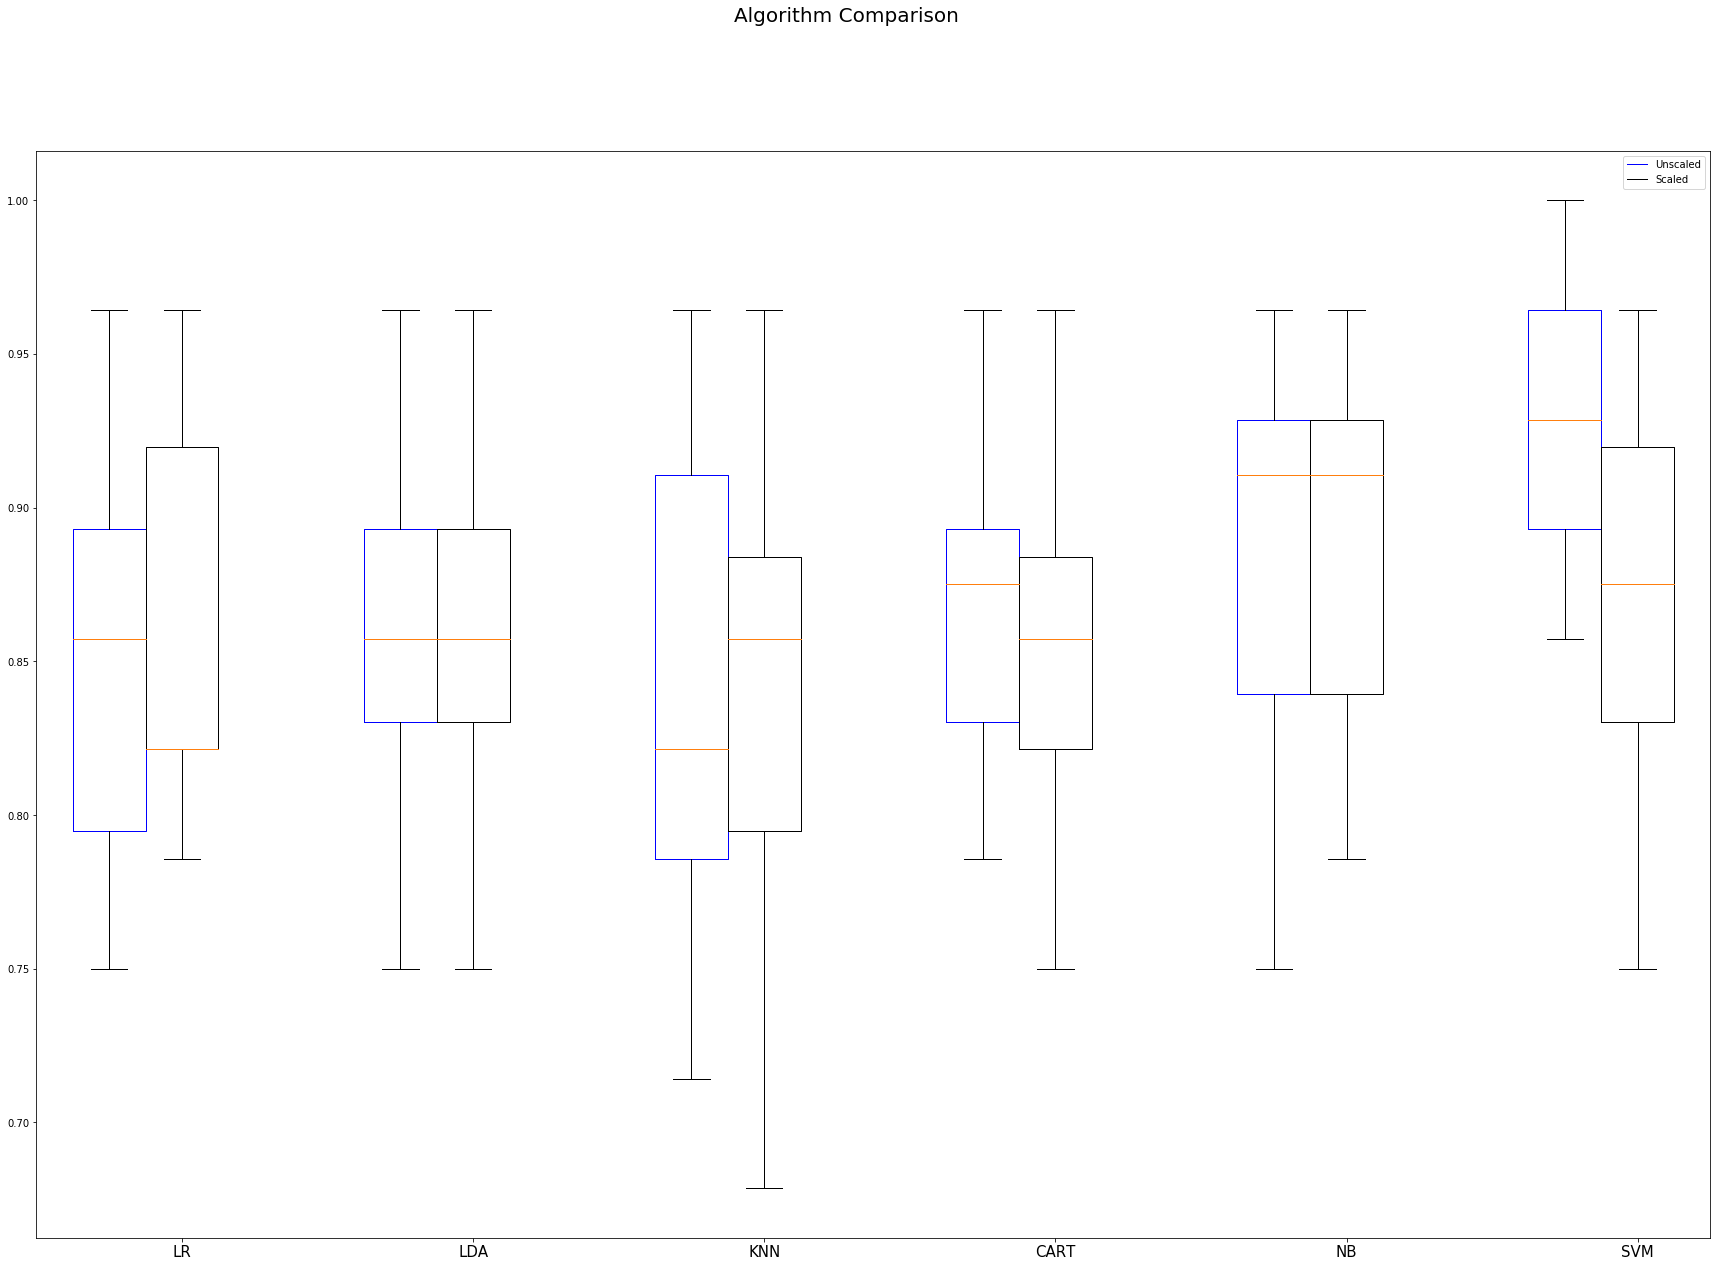

In [18]:
# plot results of training on non modified data, and modified data
fig = plt.figure(figsize=(30,20))
fig.suptitle('Algorithm Comparison', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results, positions=[1,3,5,7,9,11], boxprops=dict(color="b"))
plt.boxplot(rescaled_results, positions=[1.5,3.5,5.5,7.5,9.5,11.5])
plt.legend(['Unscaled', 'Scaled'])

# set x tick labels and change font size
ax.set_xticklabels(model_names, fontdict={'fontsize': 15})

# set bound of x so that none of the boxplots get cut off
ax.set_xbound(0.5, 12)
plt.show()

<p>Scaling between 0 and 1 did not greatly improve model performance, and caused some models to perform worse and more erratically.</p>

<h5 style='color:blue'>Listing 7b: Standardizing data </h5> 

In [19]:
# Standardize Data
standardize = StandardScaler()
standardized_X = standardize.fit_transform(X)

# Split data for training
X_standardized_train, X_standardized_validation, Y_standardized_train, Y_standardized_validation = train_test_split(standardized_X, Y, test_size=validation_size, random_state=seed)

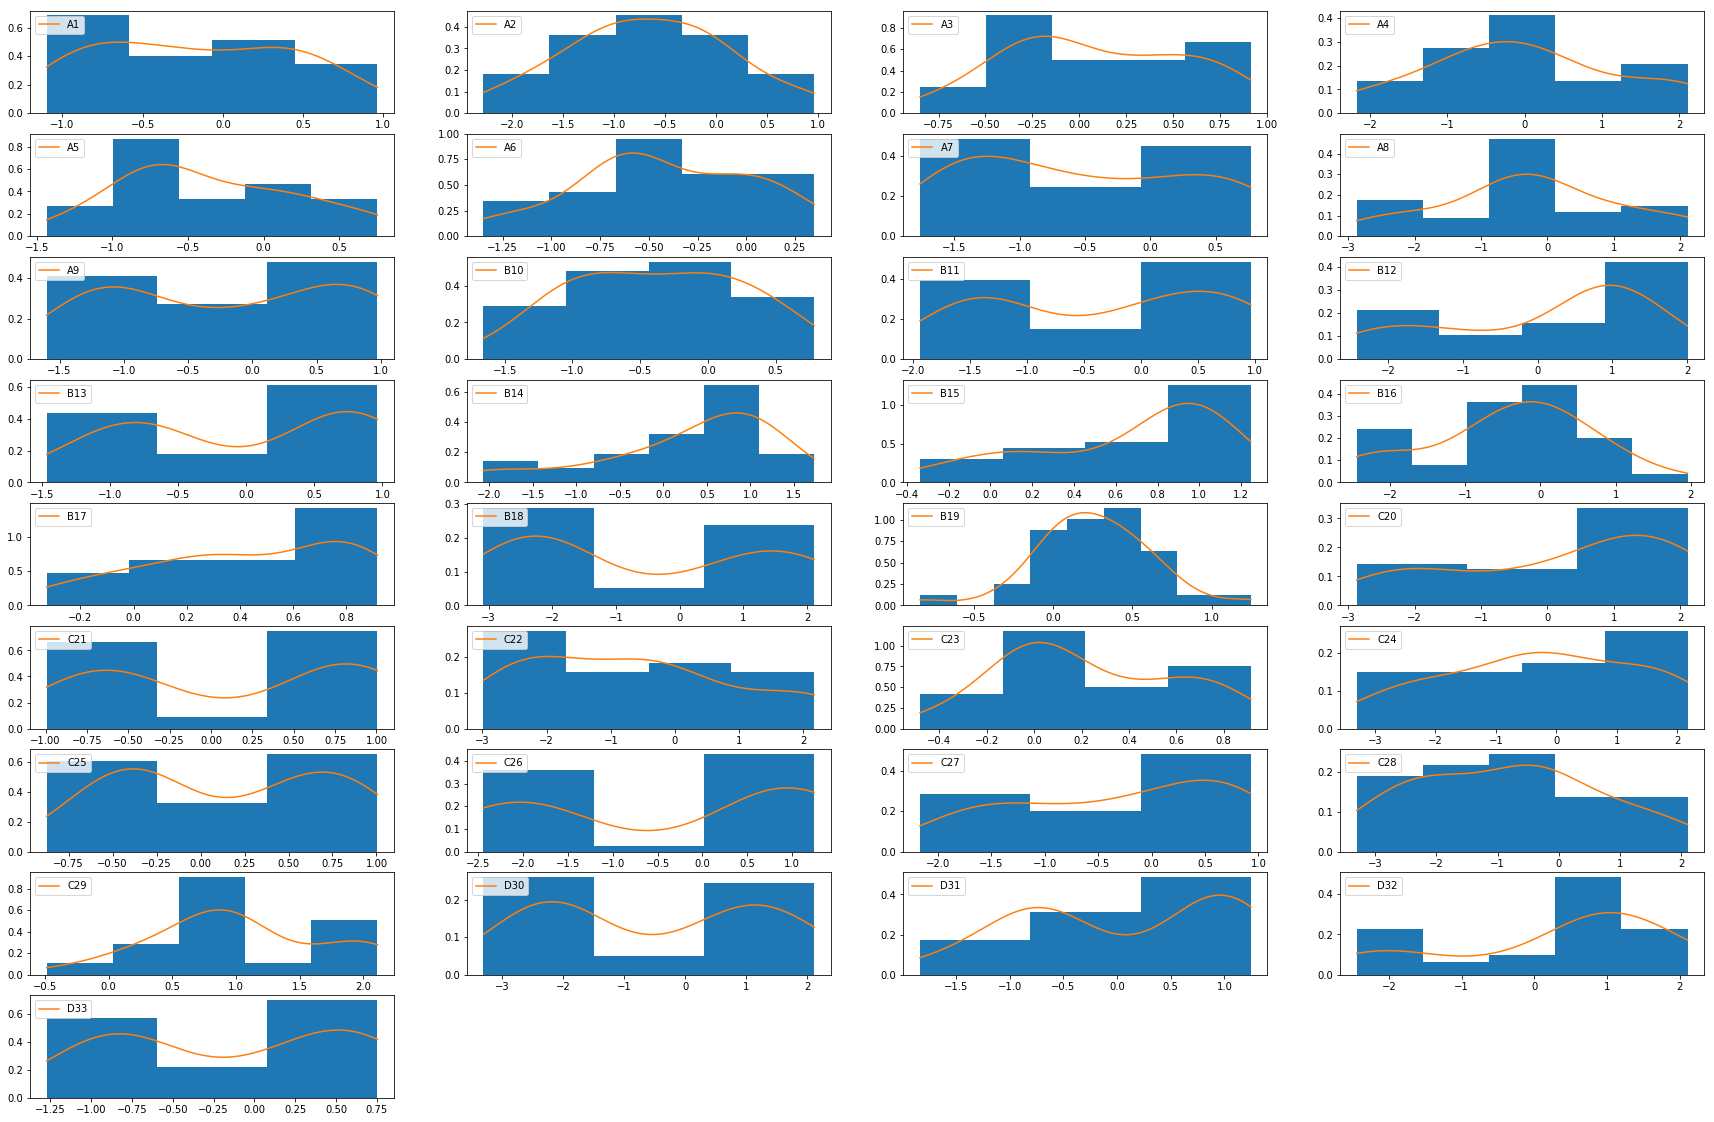

In [20]:
standardized_X_dict = dict(zip(names, standardized_X))
dataset = pd.DataFrame.from_dict(standardized_X_dict)
# plot Univariate Density Plots for all features
plt.figure(figsize=(30,20))
for i, index in enumerate(dataset.columns):
    try:
        # create a subplot to hold each univariate density plot
        plt.subplot(9,4, i + 1)
        # create a series of x values for which the Density Line will be calculated for
        positions = np.linspace(dataset[index].min(), dataset[index].max(), 1000)
        # initializa gaussian Kernel Density Estimator(KDE)
        kernel = gaussian_kde(dataset[index].values)
        # plot histogram
        plt.hist(dataset[index], bins='fd', normed=True)
        # get KDE estimates and plot them
        plt.plot(positions, kernel(positions), label=index)
        # add a legend so that it is easy to distinguish different attributes
        plt.legend(loc=2)
    except:
        # in the case where the matrix is made of a single value just plot histogram
        plt.hist(dataset[index], bins=1, normed=True)
    
plt.show()

<p>With standardization each attribute is centered around the mean and data is scaled in a way such that standard deviation equals 0. This does not solve the problem of skewed data attributes, but it does limit the range of the attribute values.</p>

In [21]:
# evaluate each model in turn,store performance, and output general performance of models
standardized_results = []
standardized_model_names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_standardized_train, Y_standardized_train, cv=kfold, scoring='accuracy')
    standardized_results.append(cv_results)
    standardized_model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.878571 (0.060187)
LDA: 0.867857 (0.061962)
KNN: 0.842857 (0.073540)
CART: 0.882143 (0.061962)
NB: 0.885714 (0.061445)
SVM: 0.946429 (0.043006)


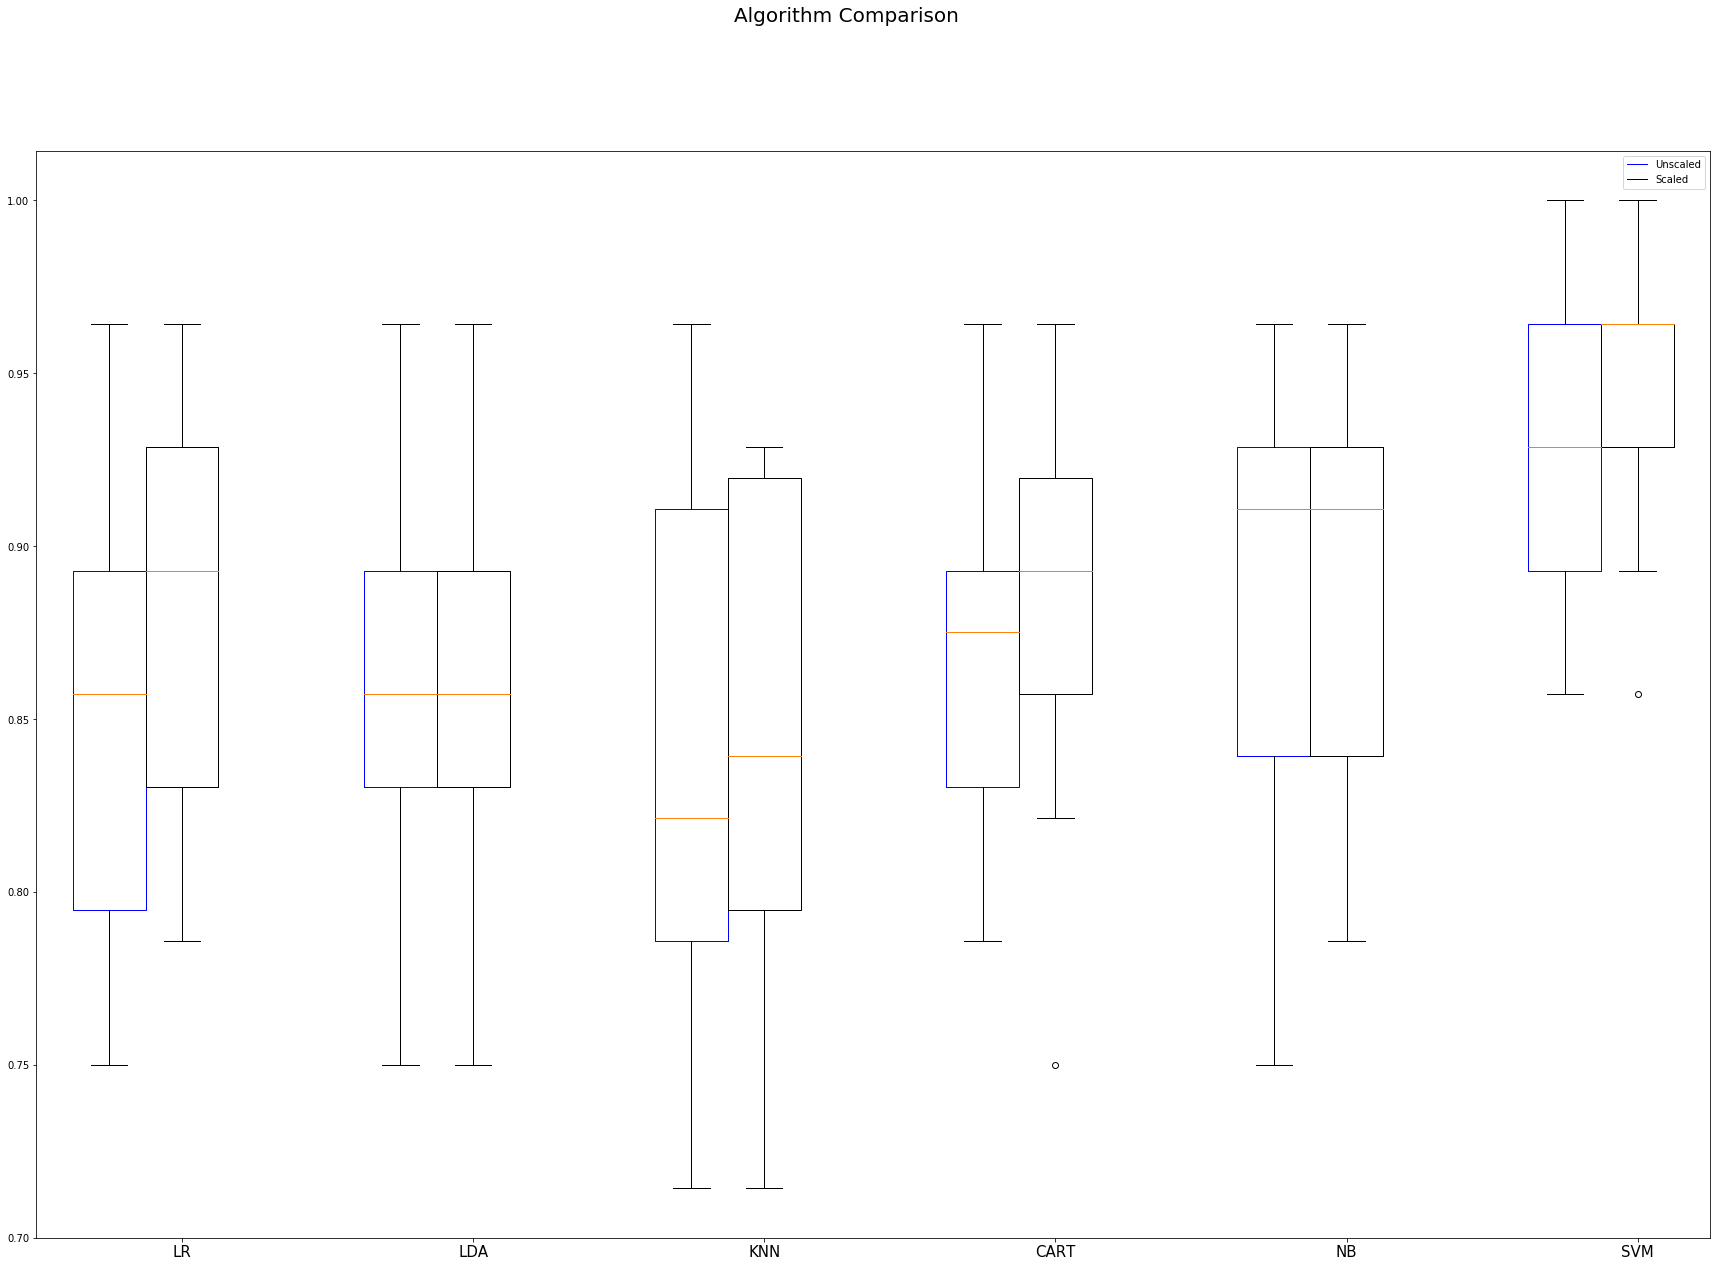

In [22]:
# plot results of training on non modified data, and modified data
fig = plt.figure(figsize=(30,20))
fig.suptitle('Algorithm Comparison', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results, positions=[1,3,5,7,9,11], boxprops=dict(color="b"))
plt.boxplot(standardized_results, positions=[1.5,3.5,5.5,7.5,9.5,11.5])
plt.legend(['Unscaled', 'Scaled'])

# set x tick labels and change font size
ax.set_xticklabels(model_names, fontdict={'fontsize': 15})

# set bound of x so that none of the boxplots get cut off
ax.set_xbound(0.5, 12)
plt.show()

<p>With data deviation reduced some model performance improved for most models as shown by the median being higher, but for the most part the performance gained is only a small percentage of 4%-5%. This method seemd to work the best for our dataset.</p>

<h5 style='color:blue'>Listing 7c: Data Normalization</h5> 

In [23]:
# Normalize Data
normalizer = Normalizer()
normalized_X = normalizer.fit_transform(X)

# Split data for training
X_normalized_train, X_normalized_validation, Y_normalized_train, Y_normalized_validation = train_test_split(normalized_X, Y, test_size=validation_size, random_state=seed)

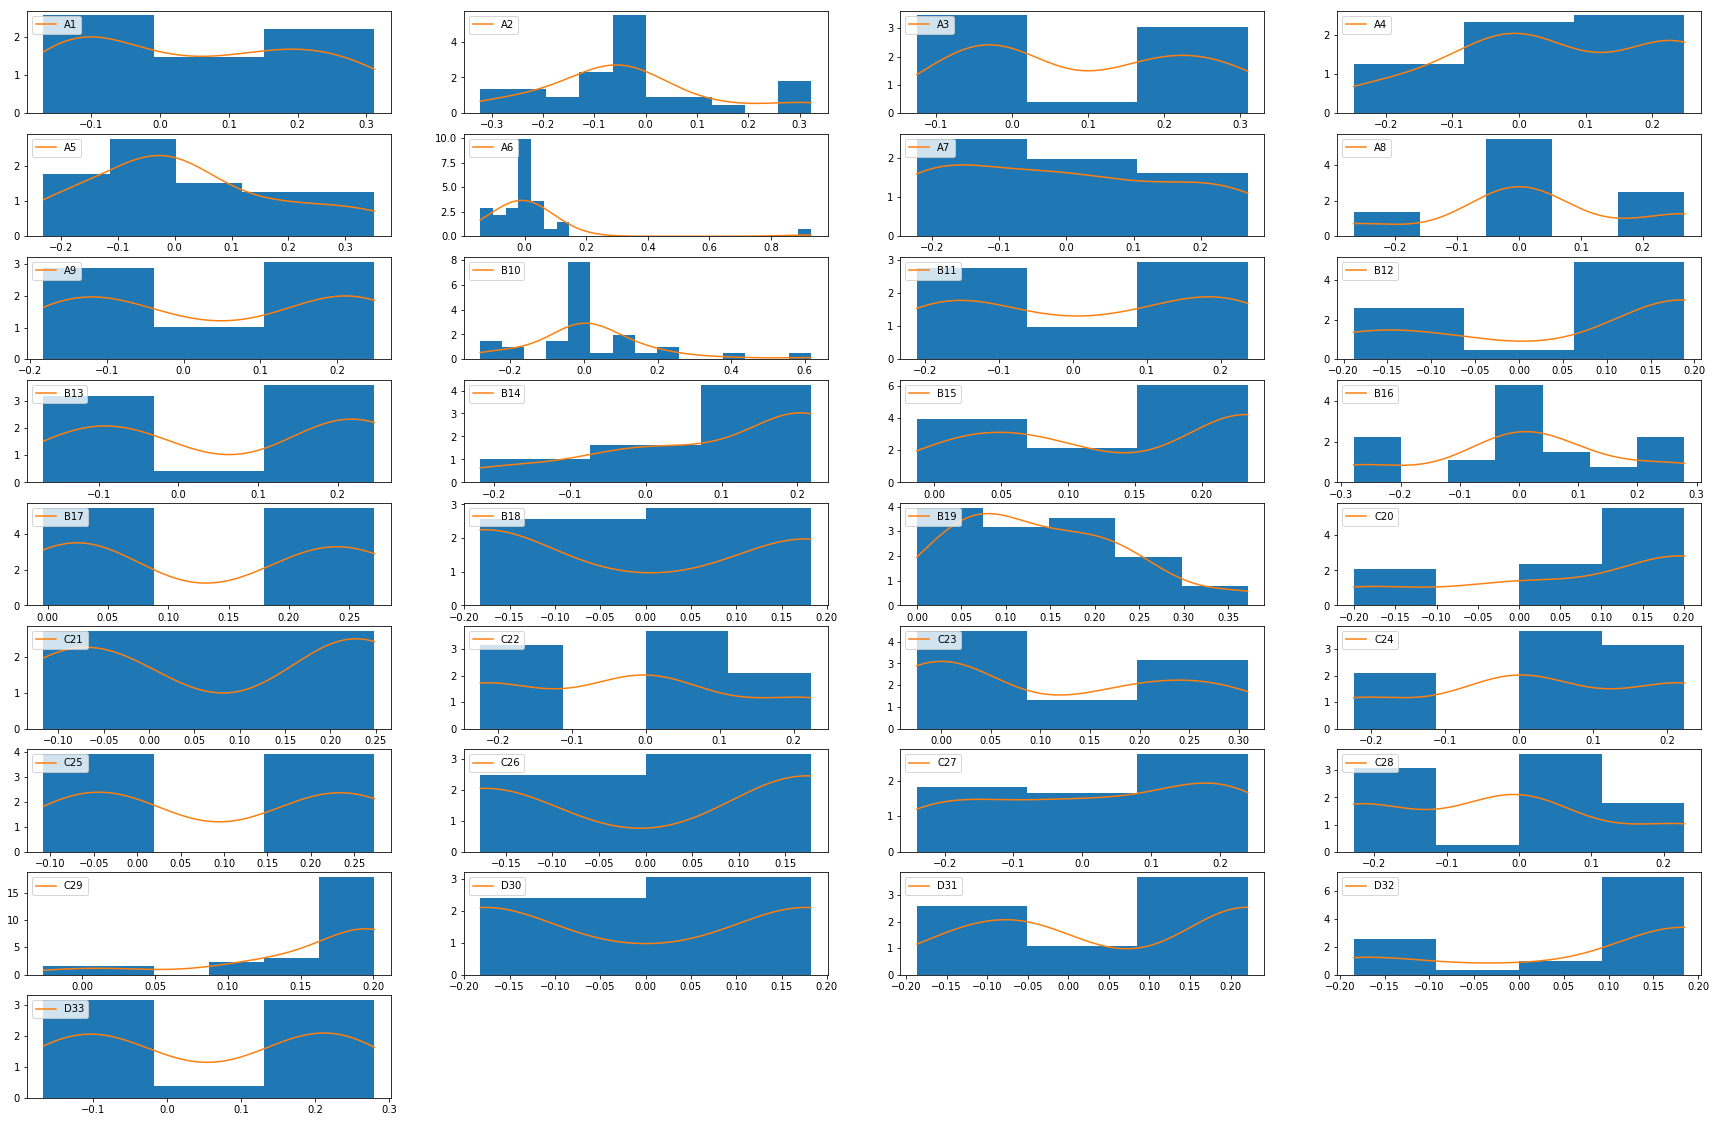

In [24]:
normalized_X_dict = dict(zip(names, normalized_X))
dataset = pd.DataFrame.from_dict(normalized_X_dict)
# plot Univariate Density Plots for all features
plt.figure(figsize=(30,20))
for i, index in enumerate(dataset.columns):
    try:
        # create a subplot to hold each univariate density plot
        plt.subplot(9,4, i + 1)
        # create a series of x values for which the Density Line will be calculated for
        positions = np.linspace(dataset[index].min(), dataset[index].max(), 1000)
        # initializa gaussian Kernel Density Estimator(KDE)
        kernel = gaussian_kde(dataset[index].values)
        # plot histogram
        plt.hist(dataset[index], bins='fd', normed=True)
        # get KDE estimates and plot them
        plt.plot(positions, kernel(positions), label=index)
        # add a legend so that it is easy to distinguish different attributes
        plt.legend(loc=2)
    except:
        # in the case where the matrix is made of a single value just plot histogram
        plt.hist(dataset[index], bins=1, normed=True)
    
plt.show()

<p>With normalization each data example is scaled independently such that its norm is equal to 1. This remove inter abnormality in each data example, but also requires a larger amount of calculations as each example requires its own calculation.</p>

In [25]:
# evaluate each model in turn,store performance, and output general performance of models
normalized_results = []
normalized_model_names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_normalized_train, Y_normalized_train, cv=kfold, scoring='accuracy')
    normalized_results.append(cv_results)
    normalized_model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.885714 (0.061445)
LDA: 0.885714 (0.052489)
KNN: 0.828571 (0.074574)
CART: 0.850000 (0.034993)
NB: 0.825000 (0.068605)
SVM: 0.753571 (0.085192)


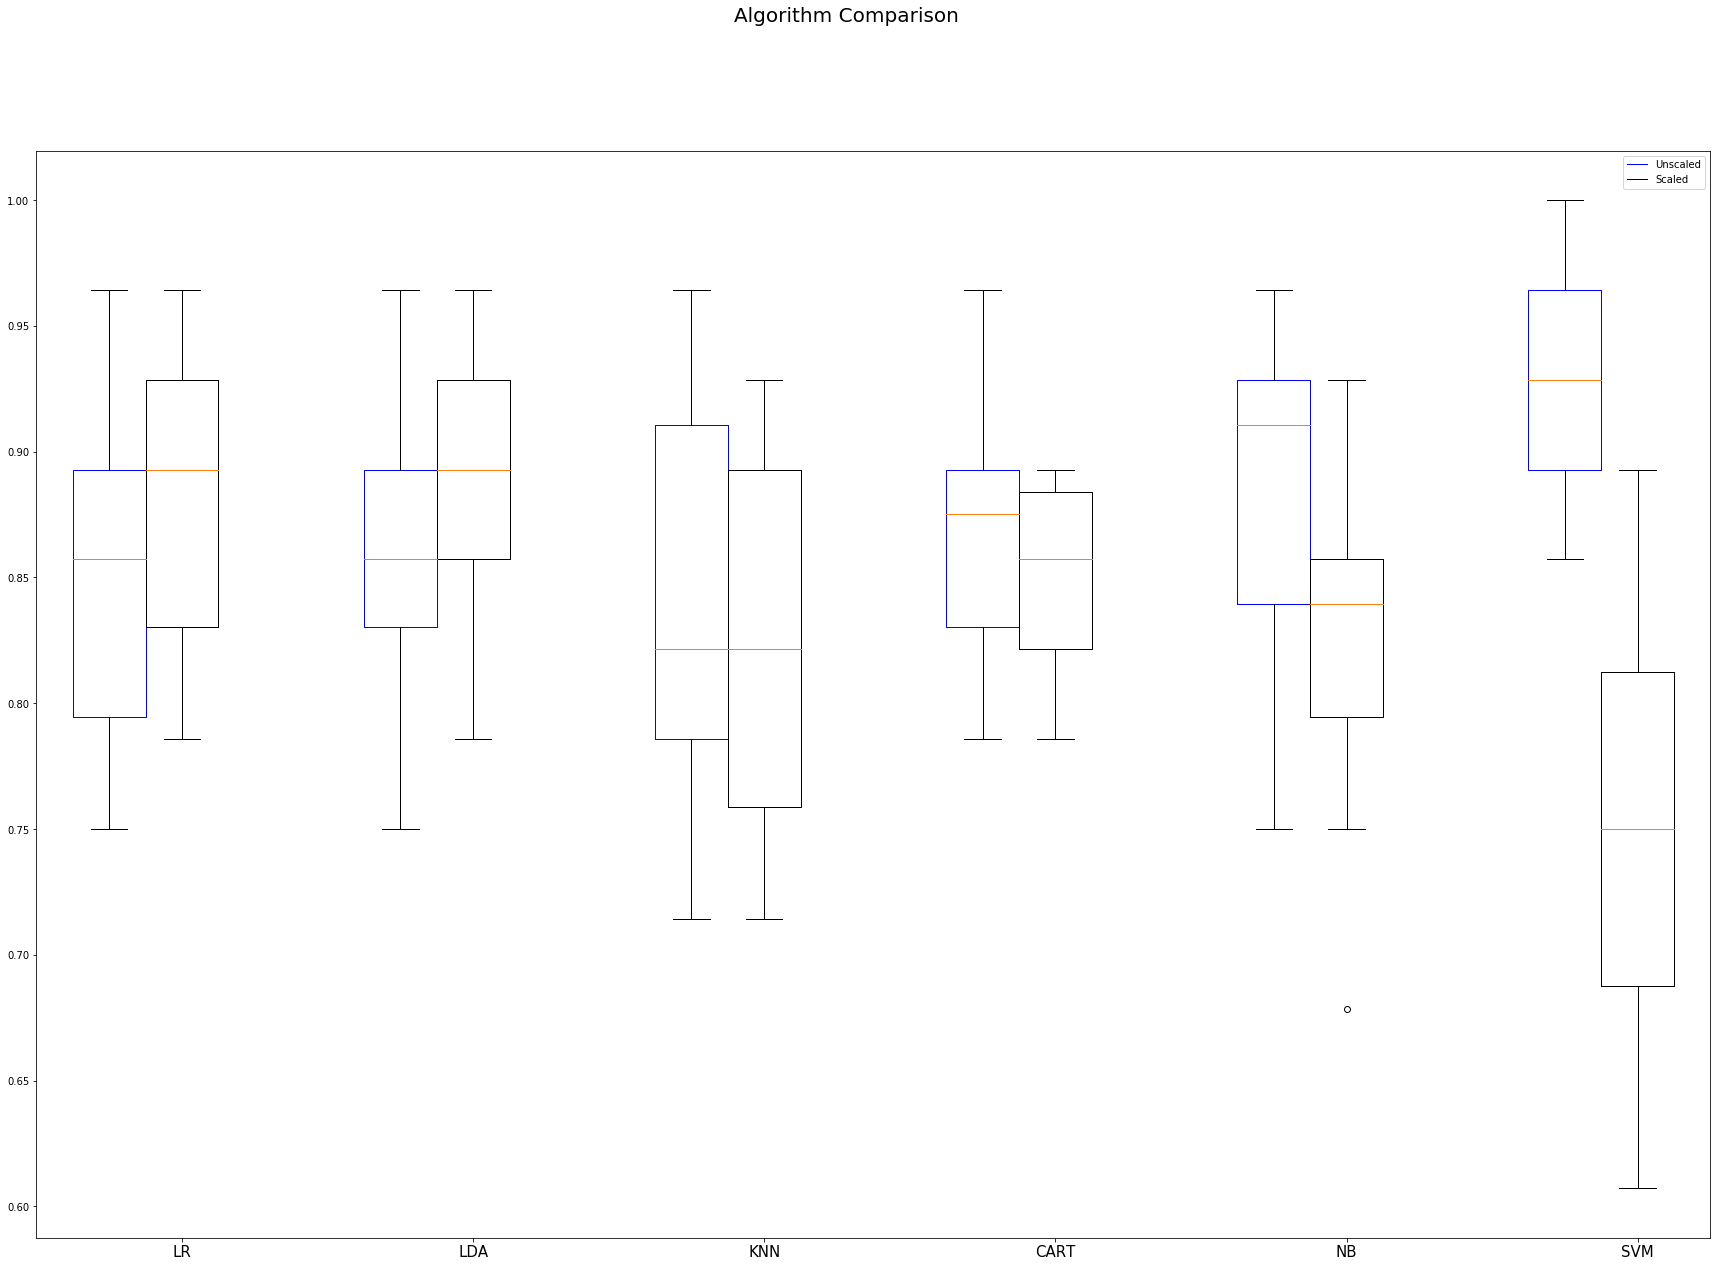

In [26]:
# plot results of training on non modified data, and modified data
fig = plt.figure(figsize=(30,20))
fig.suptitle('Algorithm Comparison', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results, positions=[1,3,5,7,9,11], boxprops=dict(color="b"))
plt.boxplot(normalized_results, positions=[1.5,3.5,5.5,7.5,9.5,11.5])
plt.legend(['Unscaled', 'Scaled'])

# set x tick labels and change font size
ax.set_xticklabels(model_names, fontdict={'fontsize': 15})

# set bound of x so that none of the boxplots get cut off
ax.set_xbound(0.5, 12)
plt.show()

<p>Similarly to data normalization some models performed better while others performed worse. Normalization did not make training more consistent, and most of the time performance dropped drastically such as with SVM.</p>

<h5 style='color:blue'>Listing 7d: Data Binarization</h5> 

In [27]:
# Binarize Data
binarizer = Binarizer()
binarized_X = binarizer.fit_transform(X)

# Split data for training
X_binarized_train, X_binarized_validation, Y_binarized_train, Y_binarized_validation = train_test_split(binarized_X, Y, test_size=validation_size, random_state=seed)

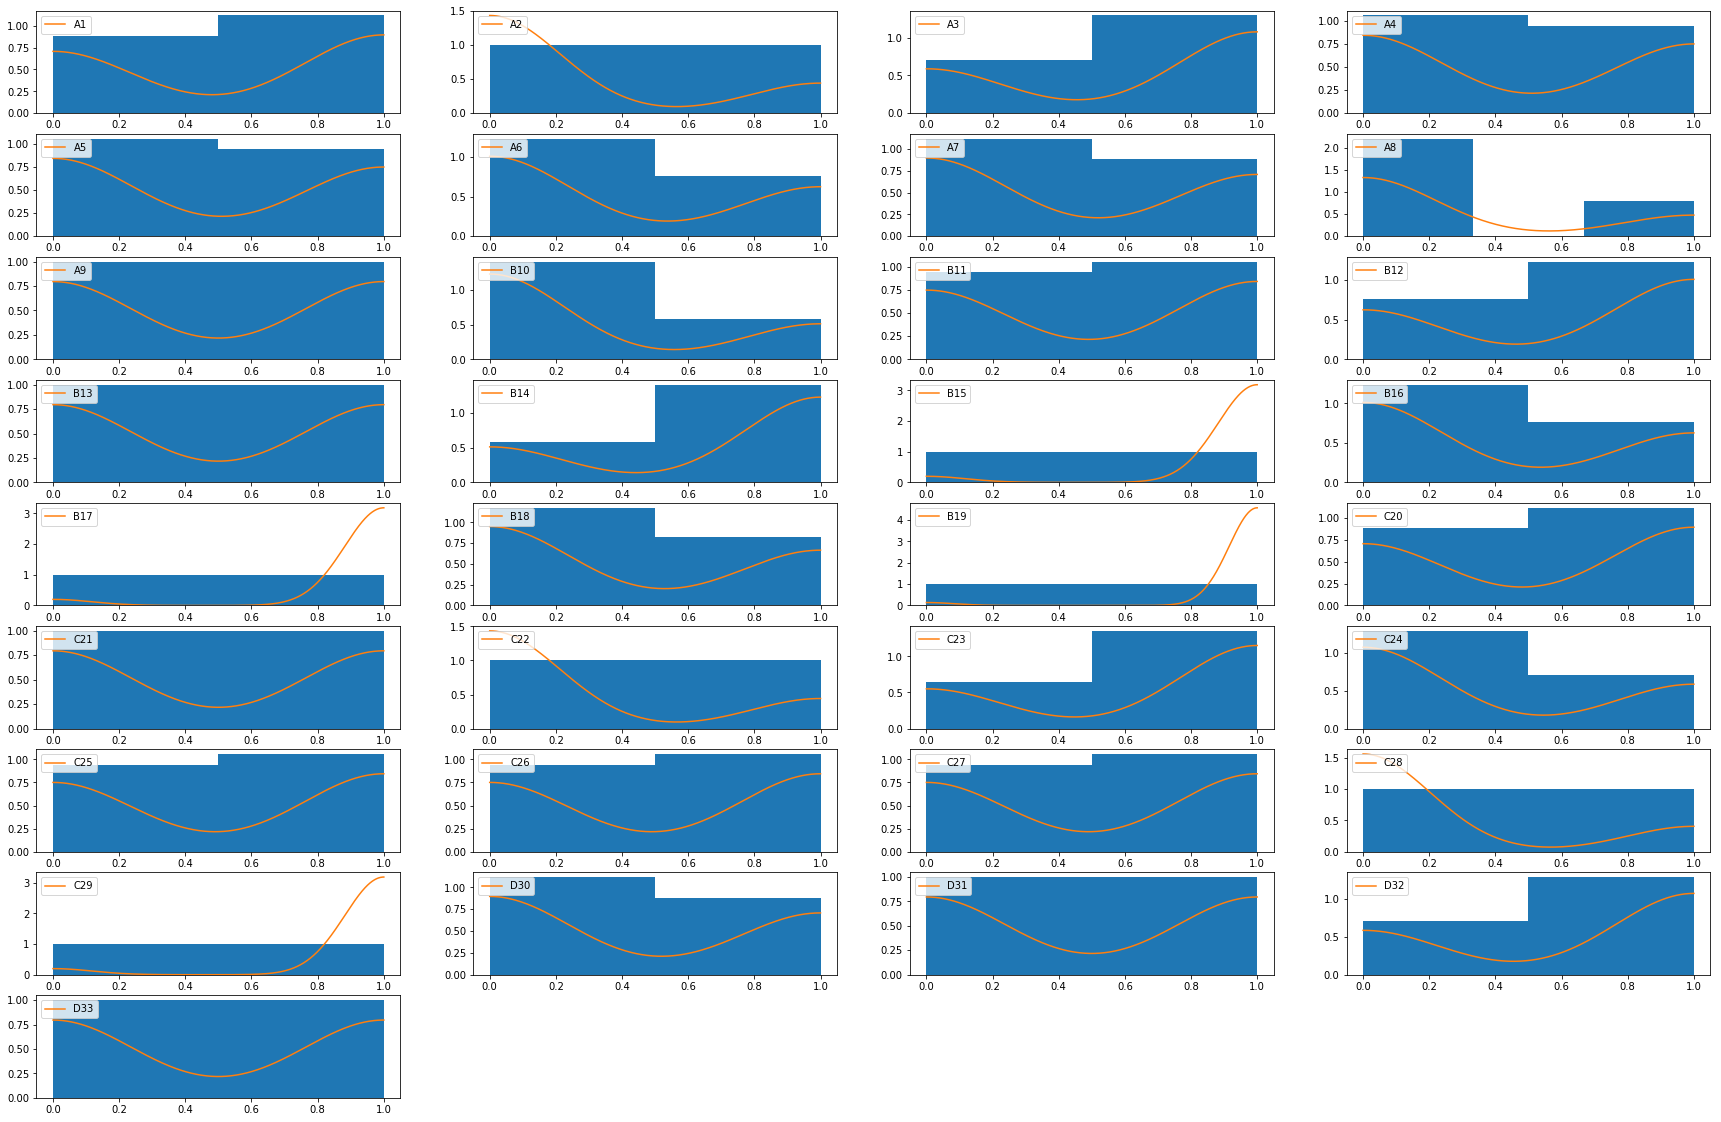

In [28]:
binarized_X_dict = dict(zip(names, binarized_X))
dataset = pd.DataFrame.from_dict(binarized_X_dict)
# plot Univariate Density Plots for all features
plt.figure(figsize=(30,20))
for i, index in enumerate(dataset.columns):
    try:
        # create a subplot to hold each univariate density plot
        plt.subplot(9,4, i + 1)
        # create a series of x values for which the Density Line will be calculated for
        positions = np.linspace(dataset[index].min(), dataset[index].max(), 1000)
        # initializa gaussian Kernel Density Estimator(KDE)
        kernel = gaussian_kde(dataset[index].values)
        # plot histogram
        plt.hist(dataset[index], bins='fd', normed=True)
        # get KDE estimates and plot them
        plt.plot(positions, kernel(positions), label=index)
        # add a legend so that it is easy to distinguish different attributes
        plt.legend(loc=2)
    except:
        # in the case where the matrix is made of a single value just plot histogram
        plt.hist(dataset[index], bins=1, normed=True)
    
plt.show()

<p>Binarization thresholds data by setting data below a threshold equal to 0 and data above the threshold to 1. This reduce variation in data and with a good threshold will also make data less skewed.</p>

In [29]:
# evaluate each model in turn,store performance, and output general performance of models
binarized_results = []
binarized_model_names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_binarized_train, Y_binarized_train, cv=kfold, scoring='accuracy')
    binarized_results.append(cv_results)
    binarized_model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.864286 (0.071071)
LDA: 0.867857 (0.069712)
KNN: 0.842857 (0.068139)
CART: 0.828571 (0.034993)
NB: 0.900000 (0.052489)
SVM: 0.857143 (0.071429)


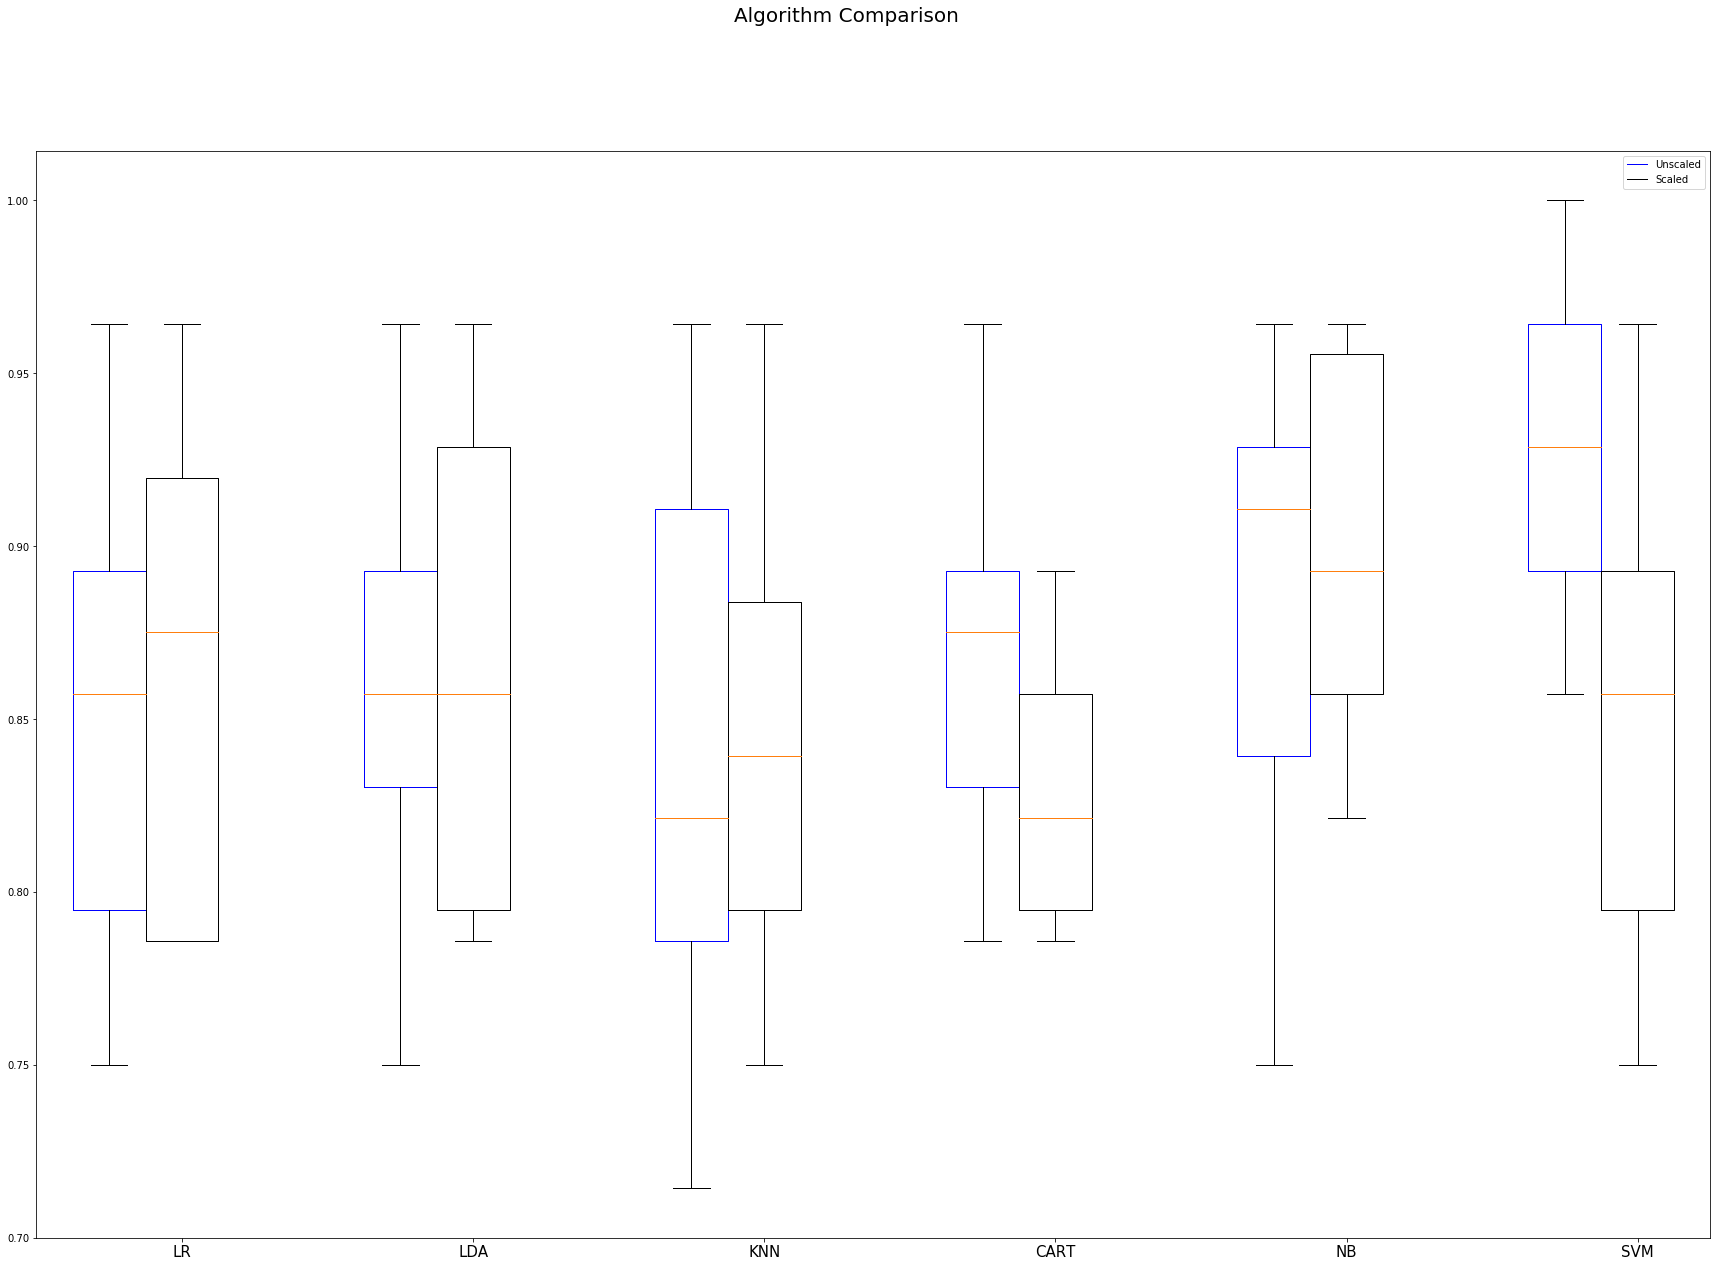

In [30]:
# plot results of training on non modified data, and modified data
fig = plt.figure(figsize=(30,20))
fig.suptitle('Algorithm Comparison', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results, positions=[1,3,5,7,9,11], boxprops=dict(color="b"))
plt.boxplot(binarized_results, positions=[1.5,3.5,5.5,7.5,9.5,11.5])
plt.legend(['Unscaled', 'Scaled'])

# set x tick labels and change font size
ax.set_xticklabels(model_names, fontdict={'fontsize': 15})

# set bound of x so that none of the boxplots get cut off
ax.set_xbound(0.5, 12)
plt.show()

<p>Similarly to data normalization some models performed better while others performed worse. Binarization seemed to make performance overall more eratic and performance degraded.</p>

<h5 style='color:blue'>Overview of Results</h5> 

<ul>
    <li>Using Perason's Equation to calculate the correlation between two attributes can be easily calculated. The only problem that we ran into was correlation of attribute 2, because all of its values are 0 thus causing NaN return because of dividing by 0 in Perason's Equation. Thus we replaced all NaN values with 0, and the correlation between attribute 'A2' and itself to 1.0.</li>
    <li> Since attributes consist of 2 attributes per pulse number, the odd numbered attributes appear to be negatively correlated to even numbered attributes. While odd numbered attributes are positively correlated to other odd numbered attributes, and even numbered atttributes have a more negative correlation to every other attribute.</li>
    <li>Skewness is a good measurement to determine the assymetry of the data which can help to determine whether data could benefit from rescaling. For the Ionosphere dataset odd attributes are more skewed than the even attributes.</li>
    <li>When scaling data there is no perfect solution to scale data due to the ranges of data attributes, and the unique qualities of each data attribute. When comparing performance between models trained on the original data and scaled data we can see that Scaling all of the data attributes between 0.0-1.0 worked the best and improved performance of models such as LR and KNN, and for SVM it reduced the volitility of the training and resulted in a more consistent performance.</li>
</ul>